<a href="https://colab.research.google.com/github/Suprita1801/Data-Science/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**


1.   A type of regression model which deals with real values not binary values.
2.   Squared error creates a great impact in the outliers while trainin gthe model.
3. To achieve best fit lines (To minimize the sum of error in each points)



# Predict the price of a house



In [ ]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

In [ ]:
print(boston.data.shape)

(20640, 8)


In [ ]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(boston.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(boston.DESCR) #Describe about the dataset.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
import pandas as pd
df = pd.DataFrame(boston.data)
print(df.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25


In [ ]:
'''
Our aim of the project is to predict the price (y) of the house for which we
are adding a column price in the exisiting dataset
'''

df['Price'] = boston.target
X = df.drop('Price', axis=1) #All datas columns are available expect Price
Y = df['Price']

In [ ]:
'''
Now we need to break data into train and test
'''

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


Ski-kit-learn is best for regression and classification not for Gradient Booster Desecnt transform or Random FOrest for this we use XGBoost.

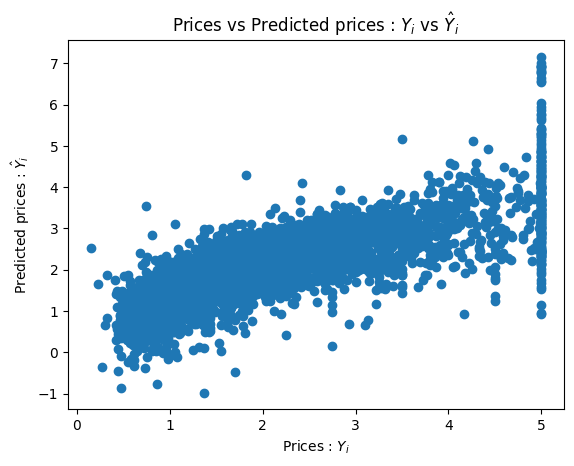

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


lm = LinearRegression()
lm.fit(X_train,Y_train)

Y_Pred = lm.predict(X_test)

plt.scatter(Y_test, Y_Pred)
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")
plt.show()



/tmp/ipython-input-19-874423972.py:7: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(delta_y), bw=0.5)


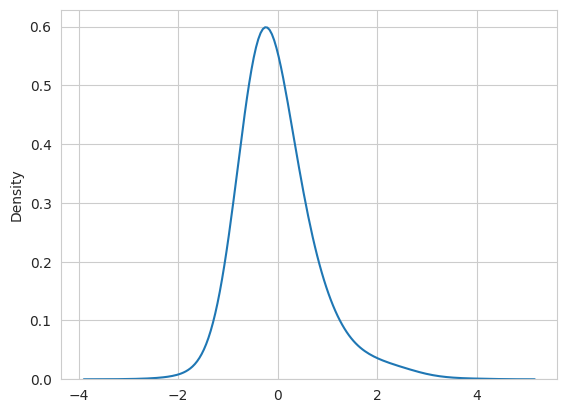

In [ ]:
delta_y = Y_test - Y_Pred #errors prediction

import seaborn as sns;
import numpy as np;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show();

From the above observation we could say that,
1. Error = 0
2. SOme outlier has sligth positive and negative range of values

/tmp/ipython-input-20-4078705879.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(Y_Pred), bw=0.5)


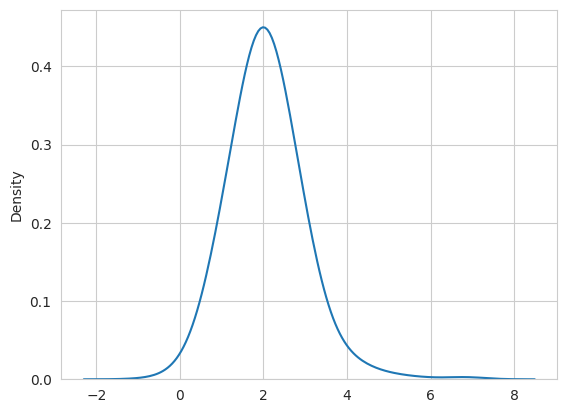

In [ ]:
# Potting the distribution of Y_Pred

sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_Pred), bw=0.5)
plt.show()

Y_Predicted is more accurate since peak is at "2"